In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
    --------------------------------------- 2.1/150.0 MB 10.7 MB/s eta 0:00:14
   - -------------------------------------- 3.9/150.0 MB 9.4 MB/s eta 0:00:16
   - -------------------------------------- 3.9/150.0 MB 9.4 MB/s eta 0:00:16
   - -------------------------------------- 5.8/150.0 MB 6.6 MB/s eta 0:00:22
   - -------------------------------------- 6.6/150.0 MB 6.3 MB/s eta 0:00:23
   - -------------------------------------- 7.3/150.0 MB 5.8 MB/s eta 0:00:25
   -- ------------------------------------- 7.9/150.0 MB 5.4 MB/s eta 0:00:27
   -- ------------------------------------- 8.9/150.0 MB 5.1 MB/s eta 0:00:28
   -- ------------------------------------- 10.0/150.0 MB 5.1 MB/s eta 0:00:28
   -- ------------------------------------- 10.7/150.0 MB 5.1 MB/s eta 0:00:28
   --- ------------------------------------ 11.8/150.0 MB 5.0 MB/s eta 0:00:28
   --- ------------------------------------ 13.1/150.0 MB 5.1 MB/s 

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [5]:
calories=pd.read_csv("calories.csv")

In [7]:
calories.head(5)


,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [9]:
exercise=pd.read_csv("exercise.csv")

In [11]:
exercise.head(5)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [13]:
data=pd.concat([exercise,calories['Calories']],axis=1)

In [15]:
data.head(5)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [17]:
data.shape

(15000, 9)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [21]:
data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [23]:
data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [25]:
sns.set()

<Axes: xlabel='count', ylabel='Gender'>

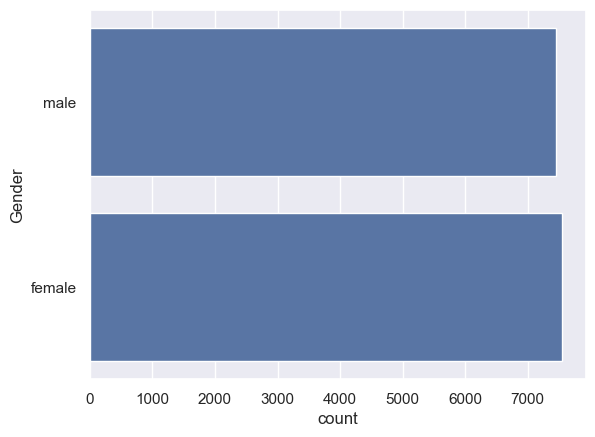

In [27]:
sns.countplot(data['Gender'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_10976\2317092479.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

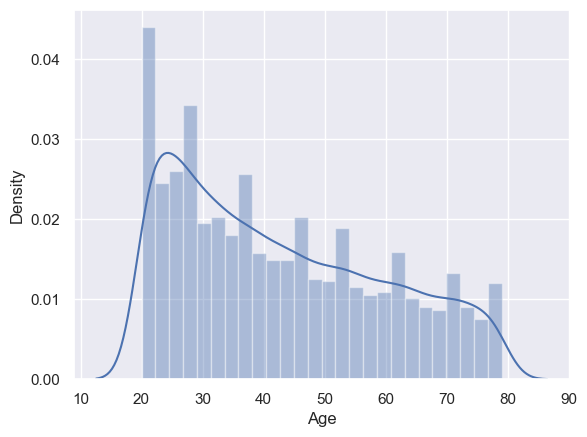

In [29]:
sns.distplot(data['Age'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_10976\4069851554.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Height'])


<Axes: xlabel='Height', ylabel='Density'>

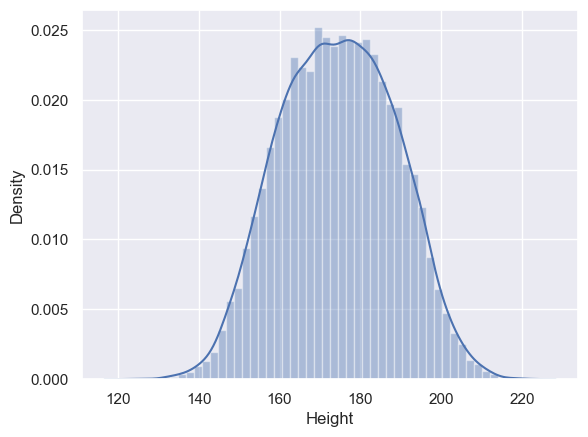

In [31]:
sns.distplot(data['Height'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_10976\2799343561.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

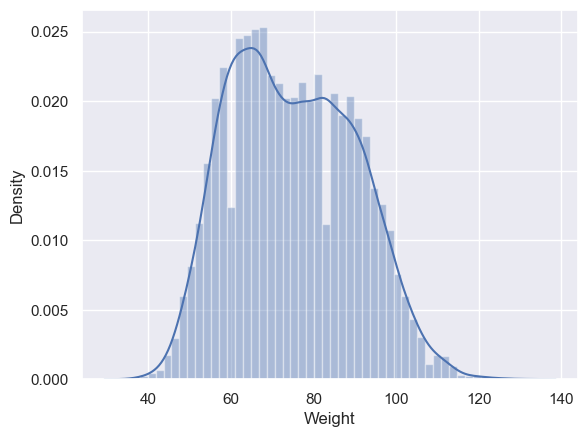

In [33]:
sns.distplot(data['Weight'])

In [35]:
correlation=data.corr(numeric_only=True)

<Axes: >

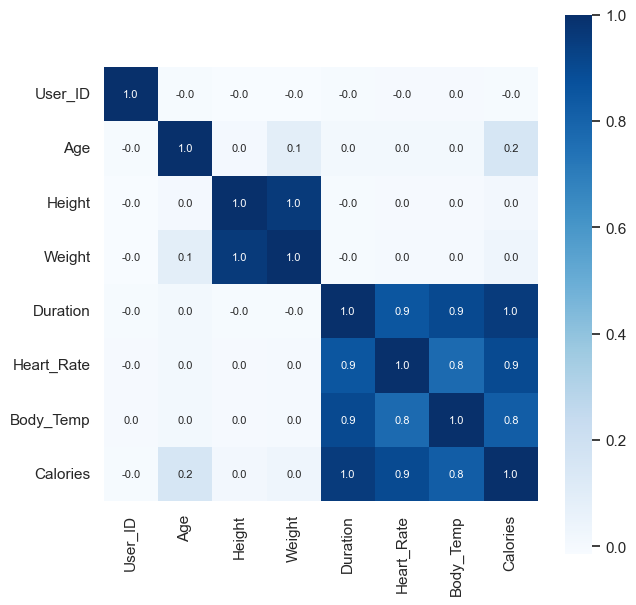

In [37]:
plt.figure(figsize=(7,7))
sns.heatmap(correlation,cbar=True,square=True,annot=True,fmt='.1f',annot_kws={'size':8},cmap='Blues')

In [39]:
data.replace({"Gender":{"male":0,"female":1}},inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_10976\359284724.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({"Gender":{"male":0,"female":1}},inplace=True)


In [41]:
data

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,1,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,1,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,1,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,0,78,193.0,97.0,2.0,84.0,38.3,11.0


In [43]:
x=data.drop(columns=['User_ID','Calories'],axis=1)
y=data['Calories']

In [45]:
print(x)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [47]:
print(y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [51]:
print(x.shape,x_test.shape,x_train.shape)

(15000, 7) (3000, 7) (12000, 7)


In [53]:
model=XGBRegressor()

In [55]:
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [57]:
model.score(x_train,y_train)*100,model.score(x_test,y_test)*100

(99.95777219604747, 99.88678909361674)

In [59]:
test_data_prediction=model.predict(x_test)
test_data_prediction

array([172.07645 , 195.7858  ,  51.708874, ..., 121.50776 ,  19.239851,
       214.43597 ], dtype=float32)

In [61]:
mae=metrics.mean_absolute_error(y_test,test_data_prediction)
print("Mean Absolute Error is:",mae)

Mean Absolute Error is: 1.4981198125282924


In [63]:
rmse = metrics.mean_squared_error(y_test, test_data_prediction)
print("RMSE:", rmse)

RMSE: 4.568956111227719


In [67]:
r2 = metrics.r2_score(y_test, test_data_prediction)
print("R² Score:", r2)

R² Score: 0.9988678909361673
